In [1]:
# loading libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.warn("ignore")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_7676/2284826543.py:7: UserWarning: ignore
  warnings.warn("ignore")


In [2]:
# load the dataset: 
data=pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# shape of data
data.shape

(5572, 5)

In [4]:
# null value of data
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#  remove last of 3 columns:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
# rename both columns:
data.rename(columns={'v1':'Target', 'v2':'SMS'},inplace=True)

In [9]:
data.tail()

,Target,SMS
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
#  encode the target variable:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Target']=le.fit_transform(data['Target'])

In [11]:
data.tail()

,Target,SMS
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [12]:
# check the duplicates
data.duplicated().sum()

403

In [13]:
# remove all these duplicates
data.drop_duplicates(keep='first',inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
# shape of data after removing duplictes:
data.shape

(5169, 2)

In [16]:
# no of values in target column: 
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

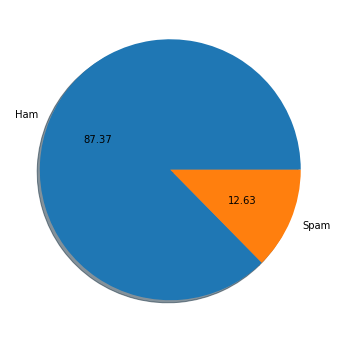

In [17]:
# make a pie chart to show the % of ham and spam:
plt.figure(figsize=(10,6))
plt.pie(data['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f',shadow=True)
plt.show()

#  as from above graph it seems that the target variable is highly imbalanced so we have to balance this.

In [18]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# to show the number of characters in a sms are:
data['Num_of_char']=data['SMS'].apply(len)

In [20]:
data.head(10)

,Target,SMS,Num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [21]:
# to show the number of words in per sms are:
data["Num_of_Words"]=data['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
# it breaks the each word of sms and show amount of words in each sms:
data.head()

,Target,SMS,Num_of_char,Num_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
 # to show the number of sentence in sms are:
data['Num_of_sentence']=data['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
data.head()

,Target,SMS,Num_of_char,Num_of_Words,Num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
col=['Num_of_char','Num_of_Words','Num_of_sentence']
data[col].describe()

,Num_of_char,Num_of_Words,Num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# discribe about wrt to ham and spam:
# for ham,
data[data['Target'] == 0][['Num_of_char','Num_of_Words','Num_of_sentence']].describe()

,Num_of_char,Num_of_Words,Num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam
data[data['Target'] == 1][['Num_of_char','Num_of_Words','Num_of_sentence']].describe()

,Num_of_char,Num_of_Words,Num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='Num_of_char', ylabel='Count'>

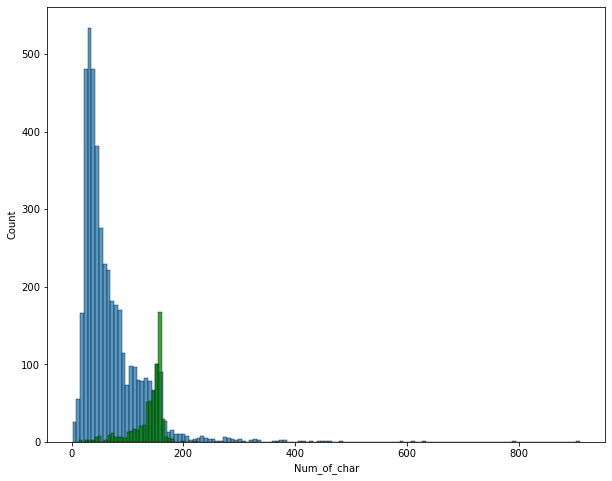

In [28]:
# to show the distrubution wrt to no of char:
plt.figure(figsize=(10,8))
sns.histplot(data[data['Target']==0]['Num_of_char'])  # Ham
sns.histplot(data[data['Target']==1]['Num_of_char'],color='g')  # spam

<AxesSubplot:xlabel='Num_of_Words', ylabel='Count'>

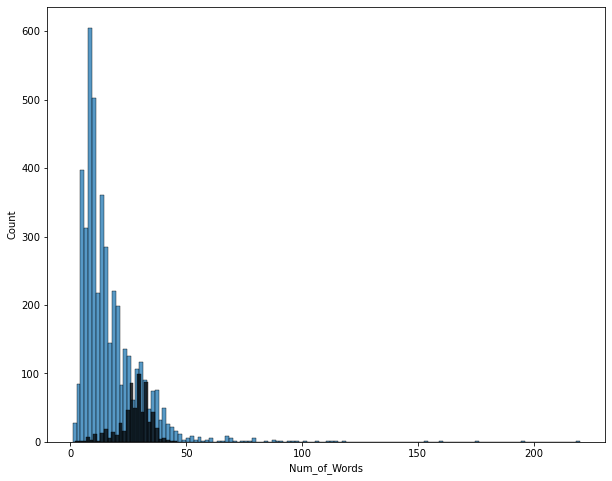

In [29]:
# to show the distrubution wrt no of words:
plt.figure(figsize=(10,8))
sns.histplot(data[data['Target']==0]['Num_of_Words'])  # Ham
sns.histplot(data[data['Target']==1]['Num_of_Words'],color='k')  # spam

<AxesSubplot:xlabel='Num_of_sentence', ylabel='Count'>

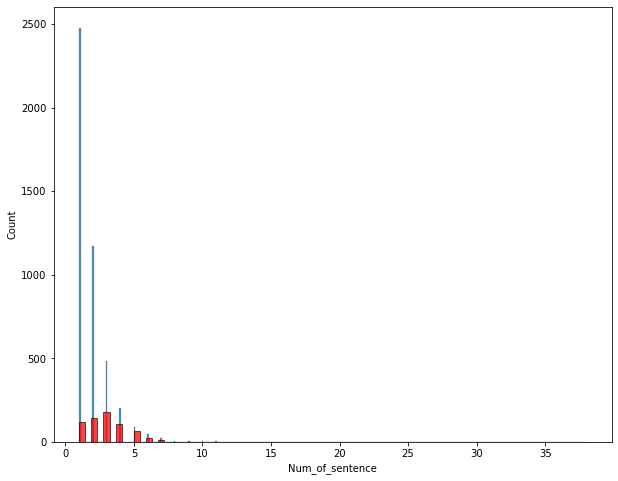

In [30]:
# to show the distrubution wrt no of sentece:
plt.figure(figsize=(10,8))
sns.histplot(data[data['Target']==0]['Num_of_sentence'])  # Ham
sns.histplot(data[data['Target']==1]['Num_of_sentence'],color='r')  # spam

<Figure size 720x720 with 0 Axes>

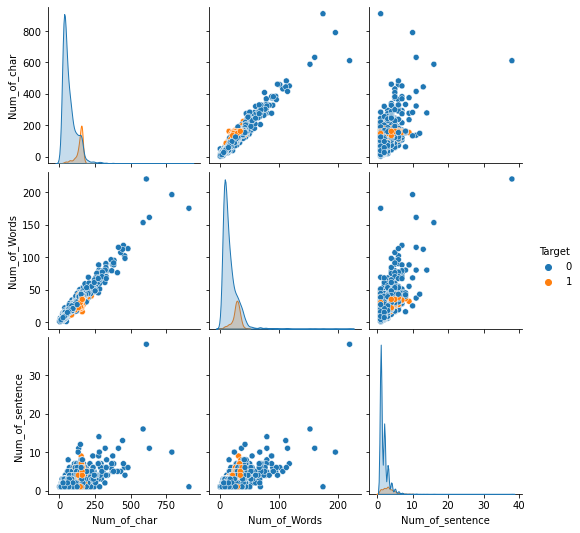

In [31]:
# relation with each others:
plt.figure(figsize=(10,10))
sns.pairplot(data,hue='Target')

In [32]:
# from above pariplot it seems that in data set there are so many outliers.

<AxesSubplot:>

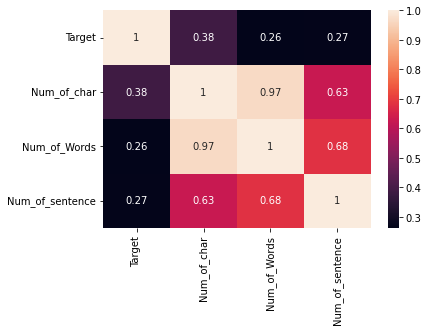

In [33]:
# corelation plot
sns.heatmap(data.corr(),annot=True)

In [34]:
# data prepocessing step ---
'''
* lower case
* tokenization
* removing special characters
* removing stop words and punctuation
* stemming
'''

'\n* lower case\n* tokenization\n* removing special characters\n* removing stop words and punctuation\n* stemming\n'

In [35]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# remove stop words:
# show list of stop words
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
# for punctuation marks
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [38]:
# stemming the words
from nltk.stem.porter import PorterStemmer
stemport=PorterStemmer()
stemport.stem("Improving")

'improv'

In [39]:
# we'll do all above steps using a single function:
def sms_transform(sms):
    sms=sms.lower()    #for lower-----
    sms=nltk.word_tokenize(sms)  #for tokenize the words
    alnum=[]
    for i in sms:
        if i.isalnum():
            alnum.append(i)     # remove special characters
            
            
    sms=alnum[:]
    alnum.clear()
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            alnum.append(i)
                    
    sms=alnum[:]
    alnum.clear()     # removing stop words and punctuation
                     
    for i in sms:
        alnum.append(stemport.stem(i))
            
    return " ".join(alnum) #stemming

In [40]:
print("Real SMS is: ",data['SMS'][5000])
print("Transformed SMS is : ",sms_transform("Nope. Since ayo travelled, he has forgotten his guy"))

Real SMS is:  Nope. Since ayo travelled, he has forgotten his guy
Transformed SMS is :  nope sinc ayo travel forgotten guy


In [41]:
# remove stop words:
# show list of stop words
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
# Now we have to add this transformed sms's into dataset so, 
data['Transformed_SMS']=data['SMS'].apply(sms_transform)

In [43]:
data.head()

,Target,SMS,Num_of_char,Num_of_Words,Num_of_sentence,Transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud

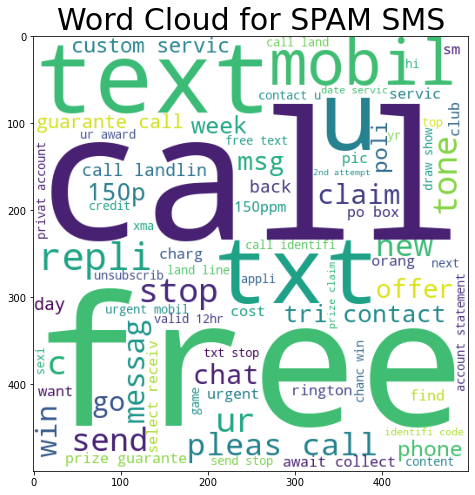

In [46]:
# for spam:
word_cloud=WordCloud(width=500, height=500, min_font_size=10,background_color='white')
wc_spam=word_cloud.generate(data[data['Target']==1]['Transformed_SMS'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.title('Word Cloud for SPAM SMS',fontsize=30)
plt.imshow(wc_spam)

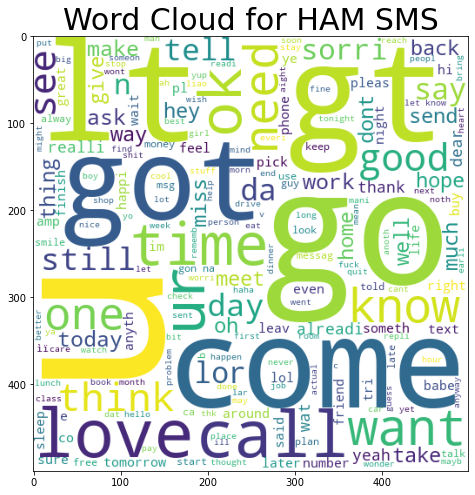

In [47]:
# for ham:
word_cloud=WordCloud(width=500, height=500, min_font_size=10,background_color='white')
wc_ham=word_cloud.generate(data[data['Target']==0]['Transformed_SMS'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.title('Word Cloud for HAM SMS',fontsize=30)
plt.imshow(wc_ham)

In [48]:
data.head()

,Target,SMS,Num_of_char,Num_of_Words,Num_of_sentence,Transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
# how many words are there in spam sms:
spam_words=[]
for sms in data[data['Target']==1]['Transformed_SMS'].tolist():
    for word in sms.split():
        spam_words.append(word)
 
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [50]:
# almost 1k words are there in spam sms's----
print("The Total of ham and spam words: ",len(spam_words))

The Total of ham and spam words:  9939


In [51]:
#  most repeated words in spam:
from collections import Counter
Counter(spam_words).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [52]:
#  make data frame of this:
spam_df=pd.DataFrame(Counter(spam_words).most_common(30))
spam_df.head(10)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


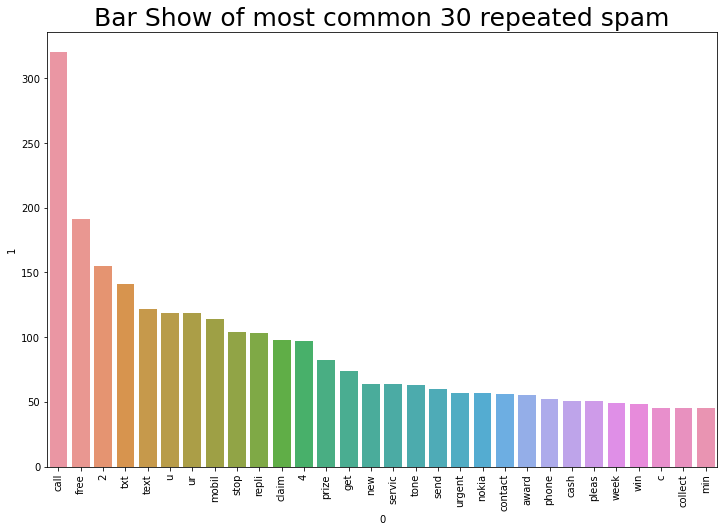

In [53]:
# graphical representation of most common 30 words repeated in spam:
plt.figure(figsize=(12,8))
sns.barplot(spam_df[0],spam_df[1])
plt.xticks(rotation='vertical')
plt.title("Bar Show of most common 30 repeated spam",fontsize=25)
plt.show()

In [54]:
# words for ham sms's:
# how many words are there in spam sms:
ham_words=[]
for sms in data[data['Target']==0]['Transformed_SMS'].tolist():
    for word in sms.split():
        ham_words.append(word)

ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [55]:
print("The Total of ham and spam words: ",len(ham_words))

The Total of ham and spam words:  35402


In [56]:
# total of the words of ham and spam are: 
total_words=len(spam_words)+len(ham_words)
print("The Total of ham and spam words: ",total_words)

The Total of ham and spam words:  45341


In [57]:
#  most repeated words in ham:
from collections import Counter
Counter(ham_words).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [58]:
#  make data frame of this:
ham_df=pd.DataFrame(Counter(ham_words).most_common(30))
ham_df.head(10)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


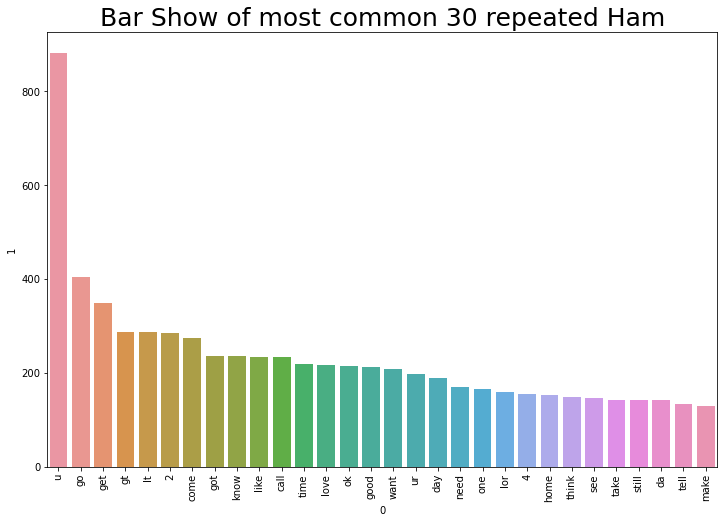

In [59]:
# graphical representation of most common 30 words repeated in ham:
plt.figure(figsize=(12,8))
sns.barplot(ham_df[0],ham_df[1])
plt.xticks(rotation='vertical')
plt.title("Bar Show of most common 30 repeated Ham",fontsize=25)
plt.show()

In [60]:
data.head()

,Target,SMS,Num_of_char,Num_of_Words,Num_of_sentence,Transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building ---

In [61]:
# vectorization of input column;
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tdif=TfidfVectorizer()

In [62]:
x=tdif.fit_transform(data['Transformed_SMS']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
x.shape

(5169, 6708)

5169 ----> shows sms and 6708 ----> shows words

In [64]:
y=data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
# split the data into train and test phase:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.3)

In [66]:
print("Shape of x_train and x_test: ",x_train.shape, x_test.shape)
print("Shape of y_train and y_test: ",y_train.shape, y_test.shape)

Shape of x_train and x_test:  (3618, 6708) (1551, 6708)
Shape of y_train and y_test:  (3618,) (1551,)


In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
# model no 1
gnb.fit(x_train,y_train)
ypred=gnb.predict(x_test)
print("The Accuracy of model is: ", accuracy_score(ypred,y_test))
print("Confusion metric model is: ")
print(confusion_matrix(ypred,y_test))
print('Precison Score of model is: ',precision_score(ypred, y_test))

The Accuracy of model is:  0.8607350096711799
Confusion metric model is: 
[[1183   27]
 [ 189  152]]
Precison Score of model is:  0.8491620111731844


In [70]:
# model no 2
mnb.fit(x_train,y_train)
ypred1=mnb.predict(x_test)
print("The Accuracy of model is: ", accuracy_score(ypred1,y_test))
print("Confusion metric model is: ")
print(confusion_matrix(ypred1,y_test))
print('Precison Score of model is: ',precision_score(ypred1, y_test))

The Accuracy of model is:  0.9593810444874274
Confusion metric model is: 
[[1372   63]
 [   0  116]]
Precison Score of model is:  0.6480446927374302


In [71]:
# model no 3
bnb.fit(x_train,y_train)
ypred2=bnb.predict(x_test)
print("The Accuracy of model is: ", accuracy_score(ypred2,y_test))
print("Confusion metric model is: ")
print(confusion_matrix(ypred2,y_test))
print('Precison Score of model is: ',precision_score(ypred2, y_test))

The Accuracy of model is:  0.973565441650548
Confusion metric model is: 
[[1366   35]
 [   6  144]]
Precison Score of model is:  0.8044692737430168


In [72]:
# loading model dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
# making object of models:
svc = SVC (kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB ()
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression (solver='liblinear', penalty='l1')
rfc = RandomForestClassifier (n_estimators=50, random_state=2)
abc = AdaBoostClassifier (n_estimators=50, random_state=2)
bc = BaggingClassifier (n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier (n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
# make classifiers
classifiers={
    "SupportVectorClassifier":svc,
    "KNearestNeighbor":knc,
    "MultinomialNB":mnb,
    "DecisionTreeClassifier":dtc,
    "LogisticRegression":lrc,
    "RandomForestClassifier":rfc,
    "AdaBoost":abc,
    "BernoulliNB":bc,
    "ExtraTreeClass":etc,
    "GradientBoostDecisionTree":gbdt,
    'XGBoost':xgb
}

In [75]:
#  make a function to train a required model:
def model_train(classifiers,x_train,y_train,x_test,y_test):
    classifiers.fit(x_train, y_train)
    y_pred=classifiers.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precison=precision_score(y_pred,y_test)
    return accuracy, precison

In [76]:
model_train(xgb,x_train,y_train,x_test,y_test)

(0.9709864603481625, 0.8044692737430168)

In [77]:
# train all the model in loop along with accuracy and precision:
accuracy_scores = []
precision_scores = []
for name, clf in classifiers.items():
    current_accuracy, current_precision = model_train(clf, x_train,y_train,x_test,y_test)
    print()
    print("For", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SupportVectorClassifier
Accuracy:  0.9729206963249516
Precision:  0.8100558659217877

For KNearestNeighbor
Accuracy:  0.912314635718891
Precision:  0.24022346368715083

For MultinomialNB
Accuracy:  0.9593810444874274
Precision:  0.6480446927374302

For DecisionTreeClassifier
Accuracy:  0.950354609929078
Precision:  0.6815642458100558

For LogisticRegression
Accuracy:  0.9580915538362347
Precision:  0.6703910614525139

For RandomForestClassifier
Accuracy:  0.9716312056737588
Precision:  0.7597765363128491

For AdaBoost
Accuracy:  0.9709864603481625
Precision:  0.7932960893854749

For BernoulliNB
Accuracy:  0.968407479045777
Precision:  0.8044692737430168

For ExtraTreeClass
Accuracy:  0.9748549323017408
Precision:  0.7932960893854749

For GradientBoostDecisionTree
Accuracy:  0.9548678272082527
Precision:  0.664804469273743

For XGBoost
Accuracy:  0.9709864603481625
Precision:  0.8044692737430168


In [78]:
dt_performance=pd.DataFrame({'Algorithm':classifiers.keys(),"Accuracy":accuracy_scores,
                            "Precision":precision_scores}).sort_values('Precision',ascending=False)
dt_performance

,Algorithm,Accuracy,Precision
0,SupportVectorClassifier,0.972921,0.810056
7,BernoulliNB,0.968407,0.804469
10,XGBoost,0.970986,0.804469
6,AdaBoost,0.970986,0.793296
8,ExtraTreeClass,0.974855,0.793296
5,RandomForestClassifier,0.971631,0.759777
3,DecisionTreeClassifier,0.950355,0.681564
4,LogisticRegression,0.958092,0.670391
9,GradientBoostDecisionTree,0.954868,0.664804
2,MultinomialNB,0.959381,0.648045


In [79]:
new_perform_dt=pd.melt(dt_performance, id_vars="Algorithm")
new_perform_dt

,Algorithm,variable,value
0,SupportVectorClassifier,Accuracy,0.972921
1,BernoulliNB,Accuracy,0.968407
2,XGBoost,Accuracy,0.970986
3,AdaBoost,Accuracy,0.970986
4,ExtraTreeClass,Accuracy,0.974855
5,RandomForestClassifier,Accuracy,0.971631
6,DecisionTreeClassifier,Accuracy,0.950355
7,LogisticRegression,Accuracy,0.958092
8,GradientBoostDecisionTree,Accuracy,0.954868
9,MultinomialNB,Accuracy,0.959381


In [82]:
#  save the files
import pickle
pickle.dump(tdif, open('Tdif_Vec.pkl','wb'))
pickle.dump(mnb, open('MOdel.pkl','wb'))

In [83]:
data['Transformed_SMS'][900]

'probabl money worri thing come due sever outstand invoic work two three month ago'